
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
      self.std = np.std(X,axis=0)
      self.mean = np.mean(X,axis=0)

    def transform(self, X):
      return (X-self.mean)/self.std

    def fit_transform(self, X):
      self.fit(X)
      return self.transform(X)


In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
      self.lr = lr
      self.epochs = epochs
      self.l2_lambda = l2_lambda
      self.w = None
      self.b = None
      self.losses = []

    def fit(self, X, y):
        m,n = X.shape
        y = y.reshape(-1,1)
        self.w = np.zeros((n,1))
        self.b = 0
        #iterating
        for _ in range(self.epochs):
          y2 = np.dot(X,self.w)+self.b   #y2 is our predicted
          error = y2 - y
          mse = np.mean(error**2)
          reg = (self.l2_lambda/(2*m)) * np.sum(self.w**2)
          self.losses.append(mse+reg)
          dw = (1/m)*np.dot(X.T,error)+(self.l2_lambda/m)*self.w
          db = (1/m)*np.sum(error)
          self.w = self.w - self.lr*dw
          self.b = self.b - self.lr*db

    def predict(self, X):
      return np.dot(X,self.w)+self.b


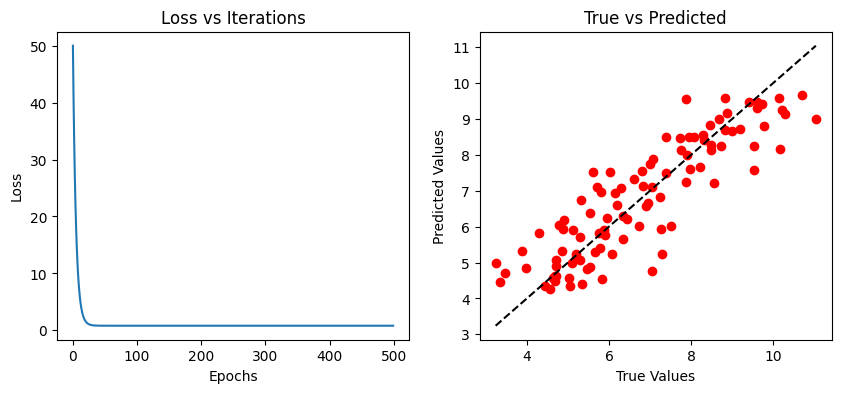

In [4]:
#creating the data
np.random.seed(42)
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)
y = y.flatten()

#scale data
scaler = StandardScalerManual()
X2 = scaler.fit_transform(X)

#training the model
model = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=0.1)
model.fit(X2,y)
predictions = model.predict(X2)

#plotting the results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(model.losses)
plt.title("Loss vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.scatter(y, predictions, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title("True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [5]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [6]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
      self.lr = lr
      self.epochs = epochs
      self.l2_lambda = l2_lambda
      self.w = None
      self.b = None
      self.losses = []

    def fit(self, X, y):
      m,n = X.shape
      y = y.reshape(-1,1)
      self.w = np.zeros((n,1))
      self.b = 0
      for _ in range(self.epochs):
        #forward pass
        linear = np.dot(X,self.w)+self.b
        y2 = sigmoid(linear)   #predicted y value
        y2 = np.clip(y2,0,1)
        bce = -np.mean(y*np.log(y2)+(1-y)*np.log(1-y2))  #bce loss
        l2 = (self.l2_lambda/(2*m))*np.sum(self.w**2)  #l2 loss
        self.losses.append(bce+l2)
        #finding the gradients
        error = y2-y
        dw = (1/m)*np.dot(X.T,error)+(self.l2_lambda/m)*self.w
        db = (1/m)*np.sum(error)
        #updating the weights
        self.w -= self.lr*dw
        self.b -= self.lr*db

    def predict_proba(self, X):
      l2 = np.dot(X,self.w)+self.b
      return sigmoid(l2)

    def predict(self, X):
      probs = self.predict_proba(X)
      return [1 if prob >= 0.5 else 0 for prob in probs]



Final Accuracy: 99.0 %


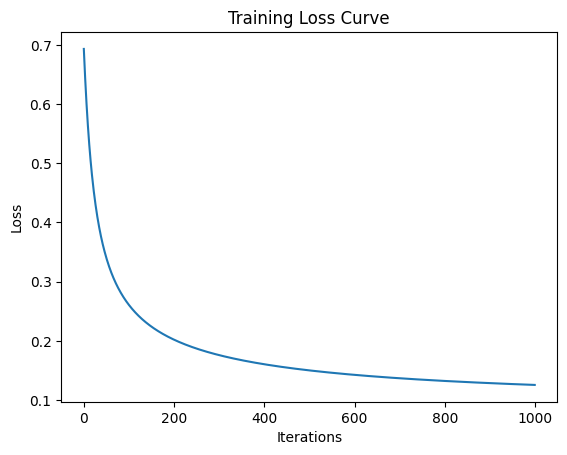

In [7]:
#plotting the data
#creating testing data
np.random.seed(42)
X = np.random.randn(100,2)
y = (X[:,0]+X[:,1]>0).astype(int) #simple diagonal separation

#reusing the scalar
scaler = StandardScalerManual()
Xs = scaler.fit_transform(X)

#training the model
model = LogisticRegressionManual(lr=0.1,epochs=1000, l2_lambda=0.1)
model.fit(Xs,y)

#accuracy writing
preds = model.predict(Xs)
acc = np.mean(preds == y)
perc = acc*100   #percentage accuracy
perc = round(perc,2)
print("Final Accuracy:",perc,"%")
#plotting the loss
plt.plot(model.losses)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [8]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    flat = M.flatten()
    n,m = M.shape
    centroids = np.random.choice(flat,k,replace=False)
    #iterating
    for _ in range(max_iters):
      dis = np.abs(flat[:,np.newaxis]-centroids)
      label = np.argmin(dis,axis=1)
      cen2 = np.array([np.mean(flat[label==i]) for i in range(k)])
      if np.all(centroids==cen2):
        break
      centroids = cen2
      assignment_table = label.reshape(n,m)
      cookbook = {i : [] for i in range(k)}
      for i in range(n):
        for j in range(m):
          cid = assignment_table[i][j]
          cookbook[cid].append((i,j))
    return assignment_table,cookbook,centroids


In [9]:
#testing an example for the code
np.random.seed(42)
M = np.random.randint(0,100,(6,6))  #creating a random matrix of shape 6,6
#taking k=3
table, book, cents = kmeans_matrix(M, k=3)
#printing the results
print("Assignment Table:")
print(table)
print("\nCookbook:")
print(book)
print("\nCentroids:")
print(cents)


Assignment Table:
[[0 2 1 2 0 1]
 [2 2 2 2 2 2]
 [1 1 1 0 1 2]
 [1 0 1 0 0 1]
 [1 2 0 1 2 0]
 [2 0 0 2 0 2]]

Cookbook:
{0: [(0, 0), (0, 4), (2, 3), (3, 1), (3, 3), (3, 4), (4, 2), (4, 5), (5, 1), (5, 2), (5, 4)], 1: [(0, 2), (0, 5), (2, 0), (2, 1), (2, 2), (2, 4), (3, 0), (3, 2), (3, 5), (4, 0), (4, 3)], 2: [(0, 1), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (4, 1), (4, 4), (5, 0), (5, 3), (5, 5)]}

Centroids:
[53.18181818 16.72727273 83.92857143]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
